In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In this notebook we are testing for different trends throughout the NBA season, as well as predicting entire seasons instead of randomly selecting games from the past 10 seasons.

In [2]:
df = pd.read_csv('avg_by_game')

In [3]:
df

,GameID,Home Points For,Home Points Against,Home eFG%,Home FTr,Home ORB%,Home DRB%,Home AST%,Home STL%,Home BLK%,...,Away STL%,Away BLK%,Away TOV%,Away ORTG,Away DRtg,Away GP,Away Win Rate,Home Win By,Home Wins By (Vegas),Season
0,2011-12-25 00:00:00 Boston @ New York,106.000000,104.000000,0.534000,0.459000,22.200000,63.900000,48.600000,9.700000,15.500000,...,7.500000,9.300000,16.700000,111.600000,113.700000,1,0.000000,2,4.5,2011
1,2011-12-25 00:00:00 Chicago @ Lakers,87.000000,88.000000,0.500000,0.263000,32.400000,65.200000,61.100000,6.800000,10.800000,...,15.900000,6.700000,12.800000,100.000000,98.900000,1,1.000000,-1,-5.0,2011
2,2011-12-25 00:00:00 Clippers @ Golden State,86.000000,105.000000,0.421000,0.293000,36.200000,70.500000,53.100000,4.400000,13.800000,...,10.000000,13.100000,9.300000,116.300000,95.300000,1,1.000000,-19,-4.5,2011
3,2011-12-25 00:00:00 Miami @ Dallas,94.000000,105.000000,0.433000,0.366000,18.200000,60.500000,74.200000,10.100000,0.000000,...,9.100000,11.100000,19.000000,105.700000,94.700000,1,1.000000,-11,-4.5,2011
4,2011-12-25 00:00:00 Orlando @ Oklahoma City,97.000000,89.000000,0.542000,0.361000,18.400000,72.000000,61.800000,8.600000,9.400000,...,7.600000,7.500000,16.300000,96.200000,104.800000,1,0.000000,8,7.5,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10742,2021-05-18 00:00:00 Washington @ Boston,114.189189,110.783784,0.552216,0.243108,25.018919,79.172973,58.581081,8.381081,9.870270,...,7.143243,7.621622,12.310811,109.908108,113.859459,37,0.405405,18,2.0,2020
10743,2021-05-19 00:00:00 Golden State @ Lakers,111.216216,107.702703,0.537865,0.295243,22.859459,81.416216,61.097297,8.078378,10.275676,...,8.121622,9.078378,13.235135,107.913514,110.851351,37,0.378378,3,5.5,2020
10744,2021-05-19 00:00:00 San Antonio @ Memphis,109.756757,110.216216,0.510108,0.229595,24.378378,79.027027,63.818919,8.856757,9.964865,...,7.110811,8.721622,9.451351,111.759459,112.091892,37,0.513514,4,4.5,2020
10745,2021-05-20 00:00:00 Indiana @ Washington,119.621622,118.972973,0.540973,0.293027,20.940541,77.989189,57.748649,6.821622,7.029730,...,8.321622,10.505405,11.432432,114.835135,112.835135,37,0.567568,27,3.5,2020


In [4]:
df.set_index(df['GameID'], drop=True, inplace=True)
df.drop(columns='GameID', inplace=True)


In [5]:
df

,Home Points For,Home Points Against,Home eFG%,Home FTr,Home ORB%,Home DRB%,Home AST%,Home STL%,Home BLK%,Home TOV%,...,Away STL%,Away BLK%,Away TOV%,Away ORTG,Away DRtg,Away GP,Away Win Rate,Home Win By,Home Wins By (Vegas),Season
GameID,,,,,,,,,,,,,,,,,,,,,
2011-12-25 00:00:00 Boston @ New York,106.000000,104.000000,0.534000,0.459000,22.200000,63.900000,48.600000,9.700000,15.500000,15.200000,...,7.500000,9.300000,16.700000,111.600000,113.700000,1,0.000000,2,4.5,2011
2011-12-25 00:00:00 Chicago @ Lakers,87.000000,88.000000,0.500000,0.263000,32.400000,65.200000,61.100000,6.800000,10.800000,16.700000,...,15.900000,6.700000,12.800000,100.000000,98.900000,1,1.000000,-1,-5.0,2011
2011-12-25 00:00:00 Clippers @ Golden State,86.000000,105.000000,0.421000,0.293000,36.200000,70.500000,53.100000,4.400000,13.800000,14.700000,...,10.000000,13.100000,9.300000,116.300000,95.300000,1,1.000000,-19,-4.5,2011
2011-12-25 00:00:00 Miami @ Dallas,94.000000,105.000000,0.433000,0.366000,18.200000,60.500000,74.200000,10.100000,0.000000,15.200000,...,9.100000,11.100000,19.000000,105.700000,94.700000,1,1.000000,-11,-4.5,2011
2011-12-25 00:00:00 Orlando @ Oklahoma City,97.000000,89.000000,0.542000,0.361000,18.400000,72.000000,61.800000,8.600000,9.400000,16.100000,...,7.600000,7.500000,16.300000,96.200000,104.800000,1,0.000000,8,7.5,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-18 00:00:00 Washington @ Boston,114.189189,110.783784,0.552216,0.243108,25.018919,79.172973,58.581081,8.381081,9.870270,12.651351,...,7.143243,7.621622,12.310811,109.908108,113.859459,37,0.405405,18,2.0,2020
2021-05-19 00:00:00 Golden State @ Lakers,111.216216,107.702703,0.537865,0.295243,22.859459,81.416216,61.097297,8.078378,10.275676,13.575676,...,8.121622,9.078378,13.235135,107.913514,110.851351,37,0.378378,3,5.5,2020
2021-05-19 00:00:00 San Antonio @ Memphis,109.756757,110.216216,0.510108,0.229595,24.378378,79.027027,63.818919,8.856757,9.964865,10.843243,...,7.110811,8.721622,9.451351,111.759459,112.091892,37,0.513514,4,4.5,2020


In [6]:
train = df[df['Season']<2018]
test = df[df['Season']>=2018]

In [7]:
y_train = train['Home Win By']
x_train = train.drop(columns='Home Win By')

y_test = test['Home Win By']
x_test = test.drop(columns='Home Win By')

In [8]:
def run_model(x_train, x_test, y_train, y_test, model, scale=False):

    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    print('Training RMSE for {} model: {}'.format(model, mean_squared_error(y_train, y_train_pred)**0.5))
    print('Testing RMSE for {} model: {}'.format(model, mean_squared_error(y_test, y_test_pred)**0.5))
    

In [9]:
linreg = LinearRegression()
forest = RandomForestRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=200)
gb = GradientBoostingRegressor(learning_rate=0.2, max_depth=1, min_samples_leaf=5, min_samples_split=3, n_estimators=200, random_state=42)

In [10]:
models = [linreg,forest,gb]

In [11]:
for model in models:
    run_model(x_train, x_test, y_train, y_test, model)

Training RMSE for LinearRegression() model: 10.970805633590988
Testing RMSE for LinearRegression() model: 11.984356645118769
Training RMSE for RandomForestRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=3,
                      n_estimators=200) model: 8.475857521755453
Testing RMSE for RandomForestRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=3,
                      n_estimators=200) model: 12.278260289235847
Training RMSE for GradientBoostingRegressor(learning_rate=0.2, max_depth=1, min_samples_leaf=5,
                          min_samples_split=3, n_estimators=200,
                          random_state=42) model: 10.870276637999005
Testing RMSE for GradientBoostingRegressor(learning_rate=0.2, max_depth=1, min_samples_leaf=5,
                          min_samples_split=3, n_estimators=200,
                          random_state=42) model: 12.218234151582564


In [12]:
def beat_vegas(result, vegas, prediction):
    tie = 0
    games = 0
    wins = 0
    win_total = 0
    loss = 0
    loss_total = 0
    
    for i in range(len(result)):
        if ((result[i]>vegas[i]) & (prediction[i]>vegas[i])):
            wins += 1
            games += 1
            win_total += abs(vegas[i]-prediction[i])
            
        elif ((result[i]<vegas[i]) & (prediction[i]<vegas[i])):
            wins += 1
            games += 1
            win_total += abs(vegas[i]-prediction[i])
            
        elif (result[i]==vegas[i]):
            tie += 1
            
        else:
            loss += 1
            games += 1
            loss_total += abs(vegas[i]-prediction[i])
            
    win_rate = (wins/games)*100
    win_distance = win_total/wins
    loss_distance = loss_total/loss
    
    print('Beat Vegas {}% of the time'.format(win_rate))
    print('Vegas RMSE: {}'.format(mean_squared_error(result, vegas)**0.5))
    print('Our RMSE: {}'.format(mean_squared_error(result, prediction)**0.5))
    print('When we beat Vegas, our prediction is {} points away from the Vegas spread.'.format(win_distance))
    print('When we lose to Vegas, our prediction is {} points away from the Vegas spread.'.format(loss_distance))

In [13]:
gb.fit(x_train, y_train)
gb_train_preds = gb.predict(x_train)
gb_test_preds = gb.predict(x_test)

In [14]:
linreg.fit(x_train, y_train)
linreg_train_preds = linreg.predict(x_train)
linreg_test_preds = linreg.predict(x_test)

In [15]:
forest.fit(x_train, y_train)
forest_train_preds = forest.predict(x_train)
forest_test_preds = forest.predict(x_test)

In [16]:
beat_vegas(y_test, x_test['Home Wins By (Vegas)'], gb_test_preds)

Beat Vegas 60.85942704863424% of the time
Vegas RMSE: 13.098648737763854
Our RMSE: 12.218234151582564
When we beat Vegas, our prediction is 4.2288229545038485 points away from the Vegas spread.
When we lose to Vegas, our prediction is 2.813221759554202 points away from the Vegas spread.


In [17]:
beat_vegas(y_test, x_test['Home Wins By (Vegas)'], linreg_test_preds)

Beat Vegas 62.12524983344437% of the time
Vegas RMSE: 13.098648737763854
Our RMSE: 11.984356645118769
When we beat Vegas, our prediction is 3.921839315536555 points away from the Vegas spread.
When we lose to Vegas, our prediction is 2.48060180584784 points away from the Vegas spread.


In [18]:
beat_vegas(y_test, x_test['Home Wins By (Vegas)'], forest_test_preds)

Beat Vegas 61.15922718187875% of the time
Vegas RMSE: 13.098648737763854
Our RMSE: 12.281843108581617
When we beat Vegas, our prediction is 3.8465068385561128 points away from the Vegas spread.
When we lose to Vegas, our prediction is 2.5601384857660716 points away from the Vegas spread.


In [19]:
x_test

,Home Points For,Home Points Against,Home eFG%,Home FTr,Home ORB%,Home DRB%,Home AST%,Home STL%,Home BLK%,Home TOV%,...,Away AST%,Away STL%,Away BLK%,Away TOV%,Away ORTG,Away DRtg,Away GP,Away Win Rate,Home Wins By (Vegas),Season
GameID,,,,,,,,,,,,,,,,,,,,,
2018-10-16 00:00:00 Oklahoma City @ Golden State,108.000000,100.000000,0.479000,0.189000,37.000000,71.900000,66.700000,6.800000,13.000000,16.900000,...,63.600000,11.700000,8.700000,11.500000,97.700000,105.600000,1,0.000000,12.0,2018
2018-10-16 00:00:00 Philadelphia @ Boston,105.000000,87.000000,0.490000,0.144000,22.600000,87.800000,50.000000,6.700000,8.200000,11.900000,...,52.900000,7.700000,8.300000,14.100000,83.400000,100.700000,1,0.000000,4.5,2018
2018-10-17 00:00:00 Atlanta @ New York,126.000000,107.000000,0.515000,0.313000,20.800000,83.700000,46.700000,10.600000,11.100000,11.800000,...,46.300000,6.200000,4.500000,19.700000,94.300000,111.000000,1,0.000000,4.0,2018
2018-10-17 00:00:00 Brooklyn @ Detroit,103.000000,100.000000,0.457000,0.239000,29.200000,86.500000,53.800000,5.000000,9.100000,12.100000,...,70.000000,9.000000,7.400000,15.600000,100.000000,103.000000,1,0.000000,6.0,2018
2018-10-17 00:00:00 Cleveland @ Toronto,116.000000,104.000000,0.565000,0.217000,18.600000,71.400000,46.700000,6.000000,10.600000,8.200000,...,50.000000,4.000000,0.000000,13.500000,103.700000,115.600000,1,0.000000,12.5,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-18 00:00:00 Washington @ Boston,114.189189,110.783784,0.552216,0.243108,25.018919,79.172973,58.581081,8.381081,9.870270,12.651351,...,60.143243,7.143243,7.621622,12.310811,109.908108,113.859459,37,0.405405,2.0,2020
2021-05-19 00:00:00 Golden State @ Lakers,111.216216,107.702703,0.537865,0.295243,22.859459,81.416216,61.097297,8.078378,10.275676,13.575676,...,64.821622,8.121622,9.078378,13.235135,107.913514,110.851351,37,0.378378,5.5,2020
2021-05-19 00:00:00 San Antonio @ Memphis,109.756757,110.216216,0.510108,0.229595,24.378378,79.027027,63.818919,8.856757,9.964865,10.843243,...,57.702703,7.110811,8.721622,9.451351,111.759459,112.091892,37,0.513514,4.5,2020


In [20]:
linreg_test_preds

array([12.98355052, 22.1923054 , 20.83890318, ...,  1.4540938 ,
       -1.01826687,  2.38280839])

In [21]:
results = pd.DataFrame(columns=['linreg preds', 'vegas preds', 'results'], index=x_test.index)

In [22]:
results

,linreg preds,vegas preds,results
GameID,,,
2018-10-16 00:00:00 Oklahoma City @ Golden State,NaN,NaN,NaN
2018-10-16 00:00:00 Philadelphia @ Boston,NaN,NaN,NaN
2018-10-17 00:00:00 Atlanta @ New York,NaN,NaN,NaN
2018-10-17 00:00:00 Brooklyn @ Detroit,NaN,NaN,NaN
2018-10-17 00:00:00 Cleveland @ Toronto,NaN,NaN,NaN
...,...,...,...
2021-05-18 00:00:00 Washington @ Boston,NaN,NaN,NaN
2021-05-19 00:00:00 Golden State @ Lakers,NaN,NaN,NaN
2021-05-19 00:00:00 San Antonio @ Memphis,NaN,NaN,NaN


In [23]:
results['linreg preds'] = linreg_test_preds
results['vegas preds'] = x_test['Home Wins By (Vegas)']
results['results'] = y_test

In [24]:
results

,linreg preds,vegas preds,results
GameID,,,
2018-10-16 00:00:00 Oklahoma City @ Golden State,12.983551,12.0,8
2018-10-16 00:00:00 Philadelphia @ Boston,22.192305,4.5,18
2018-10-17 00:00:00 Atlanta @ New York,20.838903,4.0,19
2018-10-17 00:00:00 Brooklyn @ Detroit,3.576939,6.0,3
2018-10-17 00:00:00 Cleveland @ Toronto,15.827559,12.5,12
...,...,...,...
2021-05-18 00:00:00 Washington @ Boston,5.562774,2.0,18
2021-05-19 00:00:00 Golden State @ Lakers,5.873881,5.5,3
2021-05-19 00:00:00 San Antonio @ Memphis,1.454094,4.5,4


In [25]:
win_loss = []
for x in range(len(results)):
    if ((results['linreg preds'][x] > results['vegas preds'][x]) & (results['results'][x] > results['vegas preds'][x])):
        win_loss.append('W')
    elif ((results['linreg preds'][x] < results['vegas preds'][x]) & (results['results'][x] < results['vegas preds'][x])):
        win_loss.append('W')
    elif results['results'][x] == results['vegas preds'][x]:
        win_loss.append('T')
    else:
        win_loss.append('L')
        
results['win_loss'] = win_loss

In [26]:
results

,linreg preds,vegas preds,results,win_loss
GameID,,,,
2018-10-16 00:00:00 Oklahoma City @ Golden State,12.983551,12.0,8,L
2018-10-16 00:00:00 Philadelphia @ Boston,22.192305,4.5,18,W
2018-10-17 00:00:00 Atlanta @ New York,20.838903,4.0,19,W
2018-10-17 00:00:00 Brooklyn @ Detroit,3.576939,6.0,3,W
2018-10-17 00:00:00 Cleveland @ Toronto,15.827559,12.5,12,L
...,...,...,...,...
2021-05-18 00:00:00 Washington @ Boston,5.562774,2.0,18,W
2021-05-19 00:00:00 Golden State @ Lakers,5.873881,5.5,3,L
2021-05-19 00:00:00 San Antonio @ Memphis,1.454094,4.5,4,W


In [27]:
len([x for x in results['win_loss'][:2] if x=='W'])

1

In [28]:
win_rates = []
for i in range(len(results)):
    wins = len([x for x in results['win_loss'][:i+1] if x=='W'])
    games = len(results['win_loss'][:i+1])
    win_rates.append(wins/games)

In [29]:
win_rates

[0.0,
 0.5,
 0.6666666666666666,
 0.75,
 0.6,
 0.6666666666666666,
 0.7142857142857143,
 0.75,
 0.7777777777777778,
 0.7,
 0.7272727272727273,
 0.75,
 0.6923076923076923,
 0.7142857142857143,
 0.7333333333333333,
 0.75,
 0.7647058823529411,
 0.7777777777777778,
 0.7368421052631579,
 0.75,
 0.7619047619047619,
 0.7727272727272727,
 0.782608695652174,
 0.7916666666666666,
 0.8,
 0.8076923076923077,
 0.8148148148148148,
 0.7857142857142857,
 0.7931034482758621,
 0.8,
 0.8064516129032258,
 0.8125,
 0.8181818181818182,
 0.8235294117647058,
 0.8285714285714286,
 0.8055555555555556,
 0.8108108108108109,
 0.7894736842105263,
 0.7948717948717948,
 0.8,
 0.8048780487804879,
 0.7857142857142857,
 0.7906976744186046,
 0.7954545454545454,
 0.8,
 0.8043478260869565,
 0.8085106382978723,
 0.8125,
 0.8163265306122449,
 0.82,
 0.8235294117647058,
 0.8269230769230769,
 0.8113207547169812,
 0.8148148148148148,
 0.8,
 0.8035714285714286,
 0.8070175438596491,
 0.8103448275862069,
 0.8135593220338984,
 0.81

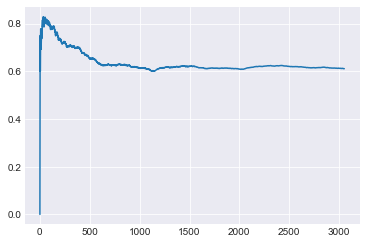

In [30]:
plt.plot(win_rates)

It looks like our model gets less accurate as the season goes on (after ~900 games is start of new season). Now we will see if the vegas line becomes "tighter" as the season goes on.

In [31]:
results['vegas dist'] = abs(results['vegas preds'] - results['results'])

In [34]:
avg_dists = []
for x in range(0,29):
    avg_dist = sum(results['vegas dist'][x*100: (x+1)*100])/100
    avg_dists.append(avg_dist)

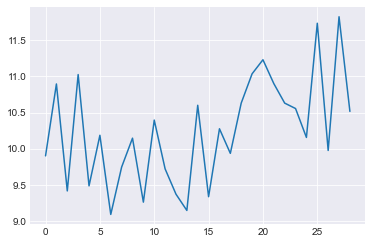

In [35]:
plt.plot(avg_dists)